# Carregando os dados

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/census.csv')

In [3]:
data

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40.0,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58.0,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22.0,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Separando dados de treino e de teste

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df = data.copy()

In [6]:
# separando features de targets

X = df.drop('income', axis=1)
y = df['income']

In [7]:
# separando os dados em treino e teste

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42)

# separando dados em treino e validação

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1, stratify=y_train_val, random_state=42)

In [8]:
# instâncias por split

print(f'Dados de treino: {X_train.shape[0]}')
print(f'Dados de validação:{X_val.shape[0]}')
print(f'Dados de teste: {X_test.shape[0]}')

Dados de treino: 26373
Dados de validação:2931
Dados de teste: 3257


# EDA

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32552 non-null  float64
 1   workclass       32561 non-null  object 
 2   final-weight    32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  int64  
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loos    32561 non-null  int64  
 12  hour-per-week   32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [32]:
# checando dados nulos

df.isna().sum()

age               9
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [11]:
sns.set_style('whitegrid')

<AxesSubplot: xlabel='income', ylabel='count'>

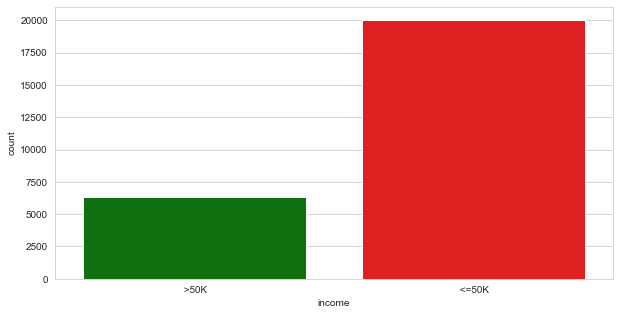

In [12]:
plt.figure(figsize=(10, 5))

sns.countplot(data=X_train.join(y_train), x='income', palette=['g', 'r'])

In [13]:
# checando a porcentagem dos dados

y_train.value_counts(normalize=True)

 <=50K    0.759186
 >50K     0.240814
Name: income, dtype: float64

## Análise de dados numéricos e categóricos

In [14]:
# separando colunas com dados numéricos

colunas_numericas = X_train.join(
    y_train).select_dtypes(include=['int64', 'float64'])

# separando colunas com dados categóricos

colunas_categoricas = X_train.join(
    y_train).select_dtypes(exclude=['int64', 'float64'])

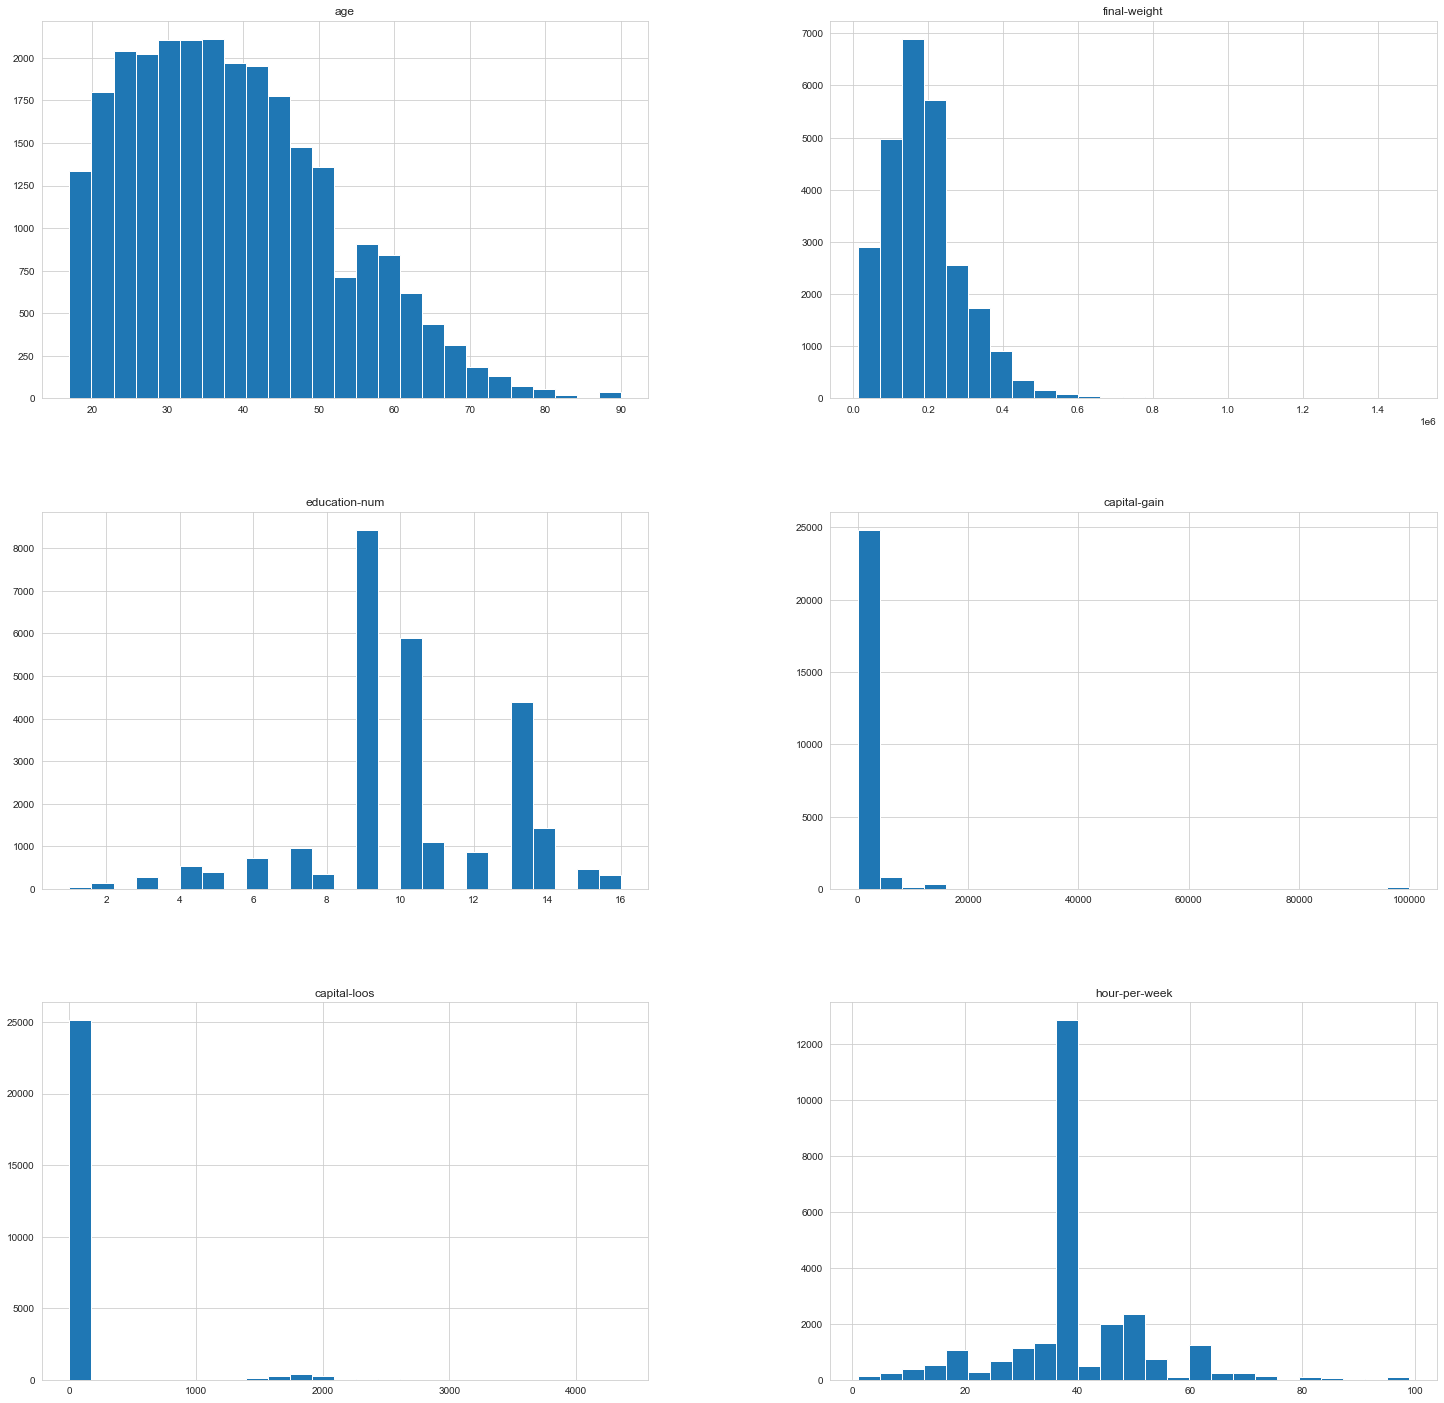

In [15]:
# checando as distribuições das variáveis numéricas

colunas_numericas.hist(figsize=(25, 25), bins=25)

In [27]:
colunas_numericas.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,26367.000000,2.637300e+04,26373.000000,26373.000000,26373.000000,26373.000000
mean,38.551333,1.895904e+05,10.094339,1074.516589,89.205475,40.500171
std,13.603194,1.055816e+05,2.583780,7365.631223,407.381974,12.385635
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.177890e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782490e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.366120e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot: xlabel='workclass', ylabel='count'>

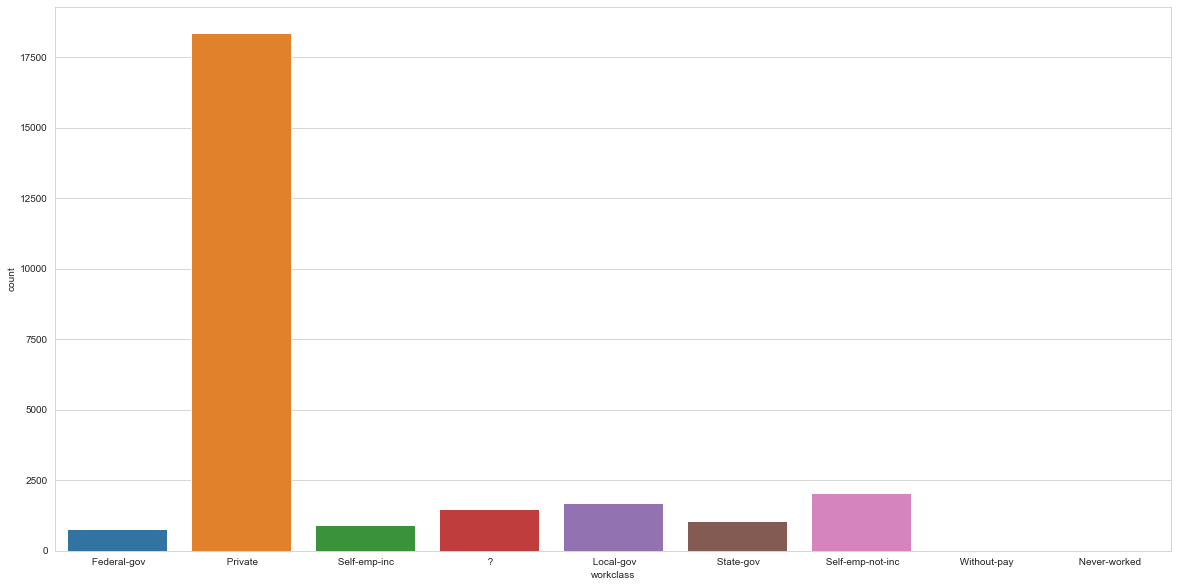

In [17]:
# análise de dados categóricos

plt.figure(figsize=(20, 10))

sns.countplot(data=X_train.join(y_train), x='workclass')

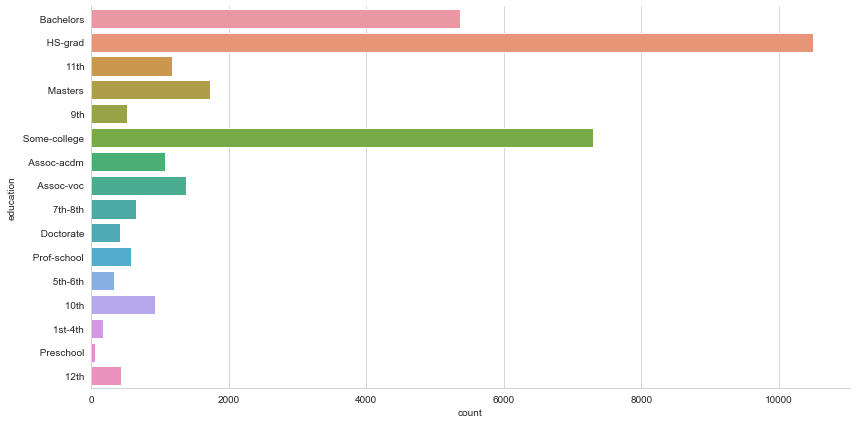

In [18]:
# análise de dados categóricos

sns.catplot(data=df, y='education', kind='count',
            height=6, aspect=2, orient='h')

<AxesSubplot: xlabel='relationship', ylabel='count'>

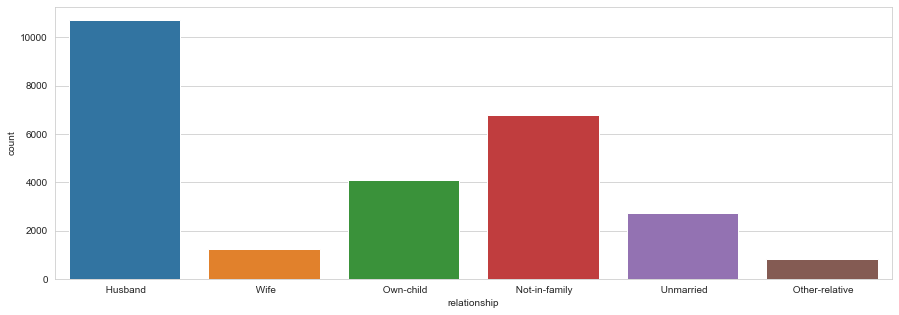

In [19]:
# análise de dados categóricos

plt.figure(figsize=(15, 5))

sns.countplot(data=X_train.join(y_train), x='relationship')

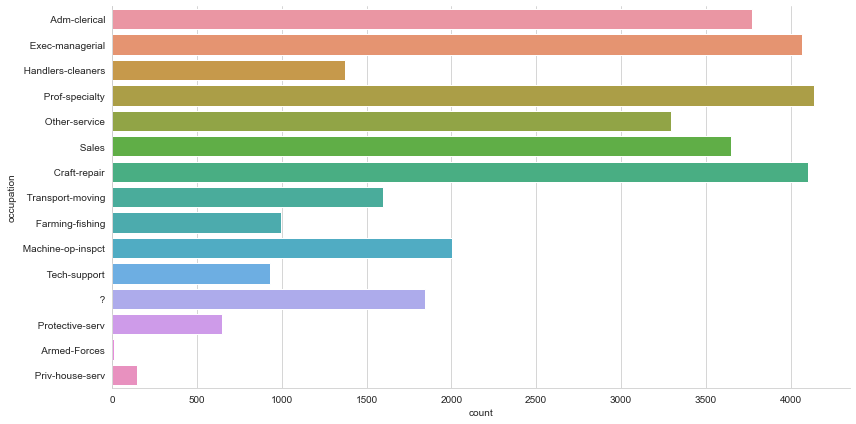

In [20]:
# análise de dados categóricos

sns.catplot(data=df, y='occupation', kind='count',
            height=6, aspect=2, orient='h')

<AxesSubplot: xlabel='race', ylabel='count'>

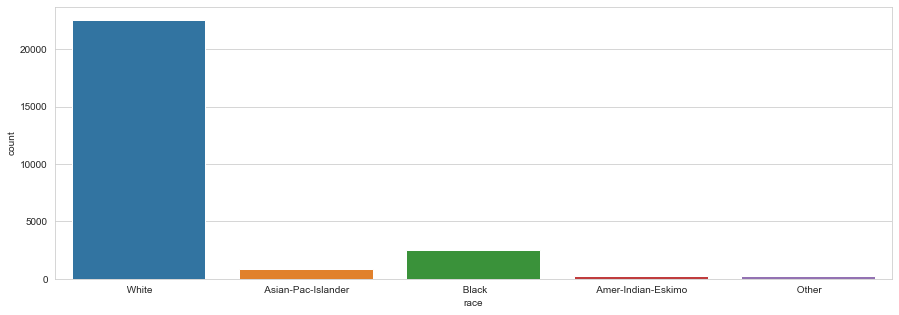

In [21]:
# análise de dados categóricos

plt.figure(figsize=(15, 5))

sns.countplot(data=X_train.join(y_train), x='race')

<AxesSubplot: xlabel='sex', ylabel='count'>

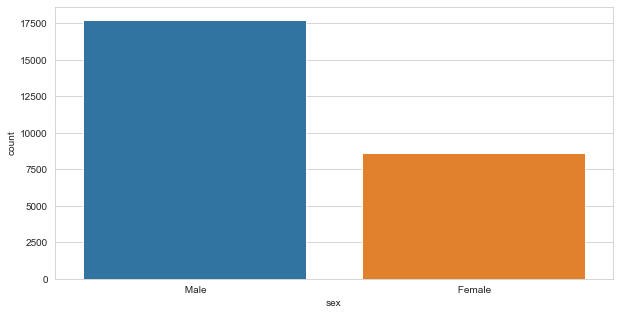

In [22]:
# análise de dados categóricos

plt.figure(figsize=(10, 5))

sns.countplot(data=X_train.join(y_train), x='sex')

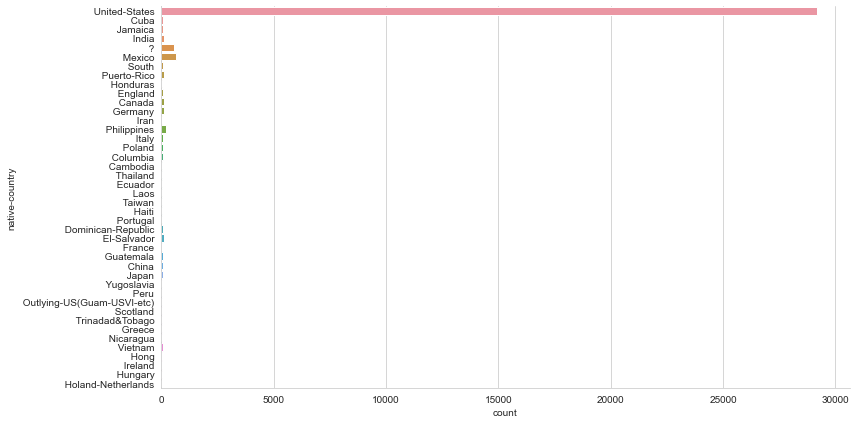

In [23]:
# análise de dados categóricos

sns.catplot(data=df, y='native-country', kind='count',
            height=6, aspect=2, orient='h')

# Criação de pipelines

> Importando as bibliotecas necessárias.

In [46]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

> Checando os dados categóricos para o **encoding**.

In [40]:
colunas_categoricas.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

Workclass -> label encoding
education -> ordinal encoding
marital-status -> dropar
occupation -> one hot encoding
relationship -> ohe
race -> label encoding
sex -> label encoding
native-country > label encoding
TARGET: income -> label encoding

> Checando os dados numéricos para o **rescale**.

In [35]:
colunas_numericas.columns

Index(['age', 'final-weight', 'education-num', 'capital-gain', 'capital-loos',
       'hour-per-week'],
      dtype='object')

age =drona

In [34]:
colunas_numericas.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,26367.000000,2.637300e+04,26373.000000,26373.000000,26373.000000,26373.000000
mean,38.551333,1.895904e+05,10.094339,1074.516589,89.205475,40.500171
std,13.603194,1.055816e+05,2.583780,7365.631223,407.381974,12.385635
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.177890e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782490e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.366120e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [57]:
# transformações para os dados numéricos

numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

# transformações para os dados categóricos

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')), # substituir nos dados nulos pela mediana
     
    ('encoding', ColumnTransformer([
        ('labelencoder', LabelEncoder(), ['workclass', 'race', 'sex', 'income']),
        
        ('ordinalencoder', OrdinalEncoder(categories=[['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad',
     'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']]), ['education']),
        
        ('onehotencoder', OneHotEncoder(sparse=False), [
         'occupation', 'relationship', 'native-country']), 
    ], remainder='drop'))
])